In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#File Paths
filepath= '/home/arik/ML_Projects/Zindi/User Behaviour Birthday Challenge/data/'
output_path = '/home/arik/ML_Projects/Zindi/User Behaviour Birthday Challenge/output/'

In [2]:
# To be joined using UserID
comments = pd.read_csv(filepath + "originals/Comments.csv")
# To be joined using UserID
competitionParticipation = pd.read_csv(filepath + "originals/CompetitionPartipation.csv")
# To be Joined using CompID
competitions = pd.read_csv(filepath + "originals/Competitions.csv")
# To be Joined using UserID
discussions = pd.read_csv(filepath + "originals/Discussions.csv")
# To be joined using UserID
submissions = pd.read_csv(filepath + "originals/Submissions.csv")
# To be joined using UserID
users = pd.read_csv(filepath + "originals/Users.csv")
# To be joined using UserID
train = pd.read_csv(filepath + "originals/Train.csv")
train['UserID'] = train['User_ID'].copy()
train.drop('User_ID', axis = 1, inplace = True)
# Concat can be done in order to create the sample submission data or the submission data can also be used.
test = pd.read_csv(filepath + "originals/Test.csv")
test['UserID'] = test['User_ID'].copy()
test.drop('User_ID', axis = 1, inplace = True)

sampleSubmission = pd.read_csv(filepath + "originals/SampleSubmission.csv")

#Can be manually opened via excel, or equivalent to check.
#variableDefinitions = pd.read_csv(filepath + "VariableDefinitions.csv")


Let's take a look at the users and see if the train and test datasets have different users.

In [3]:
train.UserID.value_counts()

ID_0ST30WFU    33
ID_LSOTZOCX    33
ID_3C6SNWXG    33
ID_UXQWGGUU    33
ID_U94BZNN1    33
               ..
ID_ZSET9NFU     1
ID_Q799EQOV     1
ID_19BLN0PI     1
ID_58K2FGIG     1
ID_3Z9BNM1S     1
Name: UserID, Length: 20218, dtype: int64

In [4]:
test.UserID.value_counts()

ID_ONNQSEFS    3
ID_QXU6L8DM    3
ID_KMMZUXJQ    3
ID_WGE2DMU3    3
ID_4KTKRW07    3
              ..
ID_Q928YGM6    1
ID_YBQ9GN1G    1
ID_4XXVLHNK    1
ID_D8JUQM0R    1
ID_AL7885G8    1
Name: UserID, Length: 22402, dtype: int64

There are many users that we do not see on the initial train dataset, that test dataset has. Let us try to tackle Other datasets in order to find the ones that are not on the train dataset.

In [5]:
differences = set(test.UserID) - set(train.UserID)
len(differences)

2184

In [6]:
# Checking if comments dataset has some users.
len(differences - set(comments))

2184

In [7]:
# Checking if competitionPartition dataset has some users.
len(differences - set(competitionParticipation))

2184

In [8]:
# Checking if discussions dataset has some users.
len(differences - set(discussions))

2184

In [9]:
# Checking if submissions dataset has some users.
len(differences - set(submissions))

2184

In [10]:
# Checking if users dataset has some users.
len(differences - set(users))

2184

In [11]:
# Checking if comments dataset has some users.
len(differences - set(users))

2184

 It seems like the differences could not be able to found at the other tables, therefore we will probably assign 0 to them.

In [12]:
train

,month,year,CompPart,Comment,Sub,Disc,Target,UserID
0,8,3,0,0,0,0,0,ID_XI7BAR4Y
1,8,2,0,0,0,0,0,ID_XI7BAR4Y
2,9,2,0,0,0,0,0,ID_XI7BAR4Y
3,9,3,0,0,0,0,0,ID_XI7BAR4Y
4,10,3,0,0,0,0,0,ID_XI7BAR4Y
...,...,...,...,...,...,...,...,...
259827,12,3,0,0,0,0,0,ID_MAP5X6D4
259828,12,3,0,0,0,0,0,ID_QHUAHU76
259829,12,3,1,0,0,0,1,ID_8IKU22O5
259830,12,3,0,0,0,0,0,ID_NHWCR1IY


In [13]:
train.UserID.value_counts()

ID_0ST30WFU    33
ID_LSOTZOCX    33
ID_3C6SNWXG    33
ID_UXQWGGUU    33
ID_U94BZNN1    33
               ..
ID_ZSET9NFU     1
ID_Q799EQOV     1
ID_19BLN0PI     1
ID_58K2FGIG     1
ID_3Z9BNM1S     1
Name: UserID, Length: 20218, dtype: int64

In [14]:
axes = train[train['UserID'] == 'ID_GNAMG9W1'].sort_values(by = ['year', 'month'], ascending=True)
axes['x_axis'] = axes['month'].astype(str) + '_' + axes['year'].astype(str)
axes.drop(['month', 'year'], inplace = True, axis = 1)


array([<AxesSubplot:xlabel='x_axis'>, <AxesSubplot:xlabel='x_axis'>,
       <AxesSubplot:xlabel='x_axis'>, <AxesSubplot:xlabel='x_axis'>,
       <AxesSubplot:xlabel='x_axis'>], dtype=object)

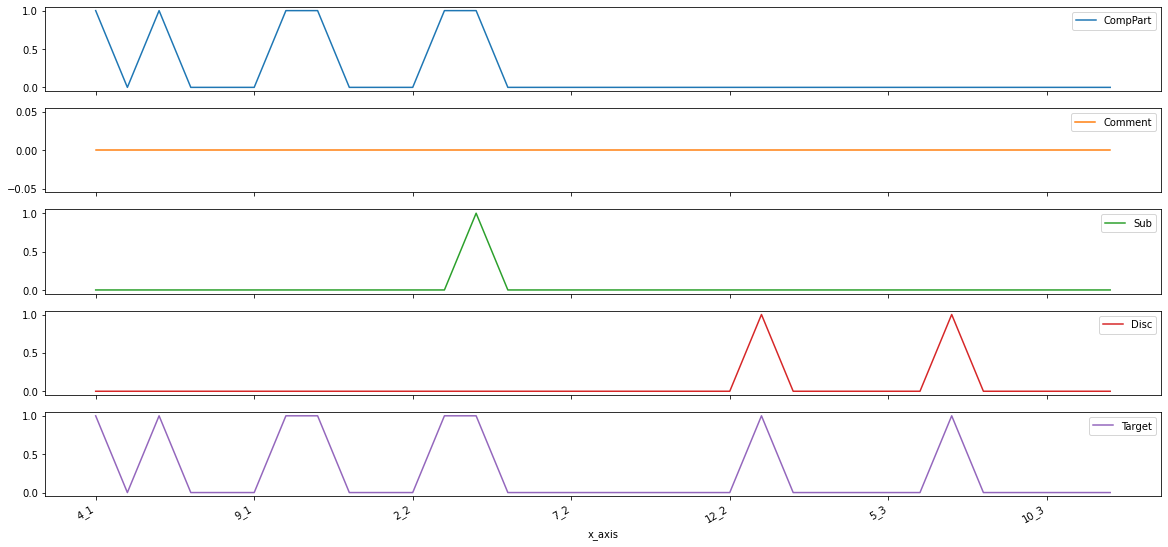

In [15]:
axes.set_index('x_axis').plot(subplots = True, figsize=(20, 10))


In [16]:
train.isna().sum()

month       0
year        0
CompPart    0
Comment     0
Sub         0
Disc        0
Target      0
UserID      0
dtype: int64

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259832 entries, 0 to 259831
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   month     259832 non-null  int64 
 1   year      259832 non-null  int64 
 2   CompPart  259832 non-null  int64 
 3   Comment   259832 non-null  int64 
 4   Sub       259832 non-null  int64 
 5   Disc      259832 non-null  int64 
 6   Target    259832 non-null  int64 
 7   UserID    259832 non-null  object
dtypes: int64(7), object(1)
memory usage: 15.9+ MB


In [18]:
competitions['CompEndTime Year'].value_counts()

3             69
2             32
4             28
not mapped    20
1              5
Name: CompEndTime Year, dtype: int64

In [19]:
# Generation of competition duration column in monthly basis for each competition.
competitions['CompEndTime Year'] = competitions['CompEndTime Year'].str.replace('not mapped', '5').astype(int)
competitions['comp_duration'] = (competitions['CompEndTime Year'] - competitions['CompStartTime Year']) * 12
competitions['month_diff_temp'] = np.nan
competitions.loc[~competitions['CompEndTime Month'].isna(), 'month_diff_temp'] = competitions[~competitions['CompEndTime Month'].isna()]['CompEndTime Month'].astype(int) - competitions[~competitions['CompStartTime Month'].isna()]['CompStartTime Month'].astype(int)
competitions['month_diff_temp'].fillna(0, inplace=True)
competitions['comp_duration'] = competitions['comp_duration'] + competitions['month_diff_temp']
competitions.drop('month_diff_temp', axis = 1, inplace = True)

In [20]:
competitions.isna().sum()

CompID                        0
Country                      23
FeatureA                      0
FeatureB                      0
FeatureC                     17
Kind                          0
Points Reward                 0
FeatureD                      0
SecretCode                    0
SubmissionLimitPerDay         4
FeatureE                      0
CompEndTime Year              0
CompEndTime Month            20
CompEndTime Day_of_week      20
CompStartTime Year            0
CompStartTime Month           0
CompStartTime Day_of_week     0
comp_duration                 0
dtype: int64

In [21]:
competitions

,CompID,Country,FeatureA,FeatureB,FeatureC,Kind,Points Reward,FeatureD,SecretCode,SubmissionLimitPerDay,FeatureE,CompEndTime Year,CompEndTime Month,CompEndTime Day_of_week,CompStartTime Year,CompStartTime Month,CompStartTime Day_of_week,comp_duration
0,ID_WGZ2,ID_HWRH,[1],[14],1.0,1,27,1,0,100.0,[1],1,8.0,7.0,1,6,5,2.0
1,ID_G370,NaN,[1],[],2.0,1,52,2,0,10.0,[1],4,1.0,6.0,3,12,7,1.0
2,ID_R5HL,NaN,[1],[],3.0,1,126,2,0,10.0,[1],4,1.0,6.0,3,10,4,3.0
3,ID_Y6XI,ID_ARVG,[1],[],4.0,1,52,2,0,10.0,[1],4,1.0,6.0,3,11,4,2.0
4,ID_8PEN,ID_I1L9,[1],[],5.0,0,2,2,0,200.0,[1],2,11.0,6.0,2,11,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,ID_F7X4,NaN,[1],[],2.0,1,2,3,0,30.0,[1],5,NaN,NaN,1,5,3,48.0
150,ID_E1LI,ID_I1L9,"[3, 2]",[14],7.0,1,2,3,0,50.0,[2],5,NaN,NaN,3,2,3,24.0
151,ID_MPSN,NaN,[1],[9],2.0,1,2,3,0,10.0,"[1, 5]",5,NaN,NaN,2,2,7,36.0
152,ID_Z5QP,ID_5OWN,[1],[],31.0,0,2,2,1,NaN,[1],3,6.0,5.0,3,6,5,0.0


In [22]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
comp_columns = competitions.select_dtypes(include=numerics).columns

competitions.Country.fillna('Other_country', inplace = True)
for column in comp_columns:
    competitions[column].fillna(competitions[column].median(), inplace = True)

In [23]:
competitions.SubmissionLimitPerDay.value_counts()

30.0     57
10.0     32
100.0    18
50.0     14
200.0    11
20.0      8
5.0       5
15.0      3
65.0      2
4.0       2
3.0       2
Name: SubmissionLimitPerDay, dtype: int64

In [24]:
# Lets get rid of the string values except commas
competitions['FeatureA'] = competitions['FeatureA'].str.replace('[', '')
competitions['FeatureA'] = competitions['FeatureA'].str.replace(']', '')
competitions['FeatureA'] = competitions['FeatureA'].str.replace(' ', '')
# Seperate the data with comma delimiter and create a temporary df to take them as features.
temp = competitions['FeatureA'].apply(lambda x: pd.Series(x.split(',')))
temp = pd.DataFrame(data = temp.values, columns = ['col1', 'col2', 'col3'])
competitions['FeatureA_1'] = temp['col1']
competitions['FeatureA_2'] = temp['col2']
competitions['FeatureA_3'] = temp['col3']
competitions.drop('FeatureA', axis = 1, inplace = True)
# Filling NaN values and '' values with '0's 
competitions.loc[competitions['FeatureA_1'].str.len() == 0, 'FeatureA_1'] = '0'
competitions.loc[competitions['FeatureA_2'].str.len() == 0, 'FeatureA_2'] = '0'
competitions.loc[competitions['FeatureA_3'].str.len() == 0, 'FeatureA_3'] = '0'
competitions['FeatureA_1'].fillna('0', inplace = True)
competitions['FeatureA_2'].fillna('0', inplace = True)
competitions['FeatureA_3'].fillna('0', inplace = True)
# Column dtype conversion
competitions['FeatureA_1'] = competitions['FeatureA_1'].astype(int)
competitions['FeatureA_2'] = competitions['FeatureA_2'].astype(int)
competitions['FeatureA_3'] = competitions['FeatureA_3'].astype(int)
del temp
# Lets get rid of the string values except commas
competitions['FeatureB'] = competitions['FeatureB'].str.replace('[', '')
competitions['FeatureB'] = competitions['FeatureB'].str.replace(']', '')
competitions['FeatureB'] = competitions['FeatureB'].str.replace(' ', '')
# Seperate the data with comma delimiter and create a temporary df to take them as features.
temp = competitions['FeatureB'].apply(lambda x: pd.Series(x.split(',')))
temp = pd.DataFrame(data = temp.values, columns = ['col1', 'col2', 'col3'])
competitions['FeatureB_1'] = temp['col1']
competitions['FeatureB_2'] = temp['col2']
competitions['FeatureB_3'] = temp['col3']
competitions.drop('FeatureB', axis = 1, inplace = True)
# Filling NaN values and '' values with '0's 
competitions.loc[competitions['FeatureB_1'].str.len() == 0, 'FeatureB_1'] = '0'
competitions.loc[competitions['FeatureB_2'].str.len() == 0, 'FeatureB_2'] = '0'
competitions.loc[competitions['FeatureB_3'].str.len() == 0, 'FeatureB_3'] = '0'
competitions['FeatureB_1'].fillna('0', inplace = True)
competitions['FeatureB_2'].fillna('0', inplace = True)
competitions['FeatureB_3'].fillna('0', inplace = True)
# Column dtype conversion
competitions['FeatureB_1'] = competitions['FeatureB_1'].astype(int)
competitions['FeatureB_2'] = competitions['FeatureB_2'].astype(int)
competitions['FeatureB_3'] = competitions['FeatureB_3'].astype(int)
del temp
# Lets get rid of the string values except commas
competitions['FeatureE'] = competitions['FeatureE'].str.replace('[', '')
competitions['FeatureE'] = competitions['FeatureE'].str.replace(']', '')
competitions['FeatureE'] = competitions['FeatureE'].str.replace(' ', '')
# Seperate the data with comma delimiter and create a temporary df to take them as features.
temp = competitions['FeatureE'].apply(lambda x: pd.Series(x.split(',')))
temp = pd.DataFrame(data = temp.values, columns = ['col1', 'col2'])
competitions['FeatureE_1'] = temp['col1']
competitions['FeatureE_2'] = temp['col2']
competitions.drop('FeatureE', axis = 1, inplace = True)
# Filling NaN values and '' values with '0's 
competitions.loc[competitions['FeatureE_1'].str.len() == 0, 'FeatureE_1'] = '0'
competitions.loc[competitions['FeatureE_2'].str.len() == 0, 'FeatureE_2'] = '0'
competitions['FeatureE_1'].fillna('0', inplace = True)
competitions['FeatureE_2'].fillna('0', inplace = True)
# Column dtype conversion
competitions['FeatureE_1'] = competitions['FeatureE_1'].astype(int)
competitions['FeatureE_2'] = competitions['FeatureE_2'].astype(int)
del temp

In [25]:
competitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CompID                     154 non-null    object 
 1   Country                    154 non-null    object 
 2   FeatureC                   154 non-null    float64
 3   Kind                       154 non-null    int64  
 4   Points Reward              154 non-null    int64  
 5   FeatureD                   154 non-null    int64  
 6   SecretCode                 154 non-null    int64  
 7   SubmissionLimitPerDay      154 non-null    float64
 8   CompEndTime Year           154 non-null    int64  
 9   CompEndTime Month          154 non-null    float64
 10  CompEndTime Day_of_week    154 non-null    float64
 11  CompStartTime Year         154 non-null    int64  
 12  CompStartTime Month        154 non-null    int64  
 13  CompStartTime Day_of_week  154 non-null    int64  

In [26]:
# Question: How to add competition information when some users can have more than one competition at the same month?
# Since it will be one row only, how to efficiently add the competition info?
# Possible answer: Gather information from this table and make it as one row in the end for each column for each month per user.
competitions

,CompID,Country,FeatureC,Kind,Points Reward,FeatureD,SecretCode,SubmissionLimitPerDay,CompEndTime Year,CompEndTime Month,...,CompStartTime Day_of_week,comp_duration,FeatureA_1,FeatureA_2,FeatureA_3,FeatureB_1,FeatureB_2,FeatureB_3,FeatureE_1,FeatureE_2
0,ID_WGZ2,ID_HWRH,1.0,1,27,1,0,100.0,1,8.0,...,5,2.0,1,0,0,14,0,0,1,0
1,ID_G370,Other_country,2.0,1,52,2,0,10.0,4,1.0,...,7,1.0,1,0,0,0,0,0,1,0
2,ID_R5HL,Other_country,3.0,1,126,2,0,10.0,4,1.0,...,4,3.0,1,0,0,0,0,0,1,0
3,ID_Y6XI,ID_ARVG,4.0,1,52,2,0,10.0,4,1.0,...,4,2.0,1,0,0,0,0,0,1,0
4,ID_8PEN,ID_I1L9,5.0,0,2,2,0,200.0,2,11.0,...,4,0.0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,ID_F7X4,Other_country,2.0,1,2,3,0,30.0,5,5.5,...,3,48.0,1,0,0,0,0,0,1,0
150,ID_E1LI,ID_I1L9,7.0,1,2,3,0,50.0,5,5.5,...,3,24.0,3,2,0,14,0,0,2,0
151,ID_MPSN,Other_country,2.0,1,2,3,0,10.0,5,5.5,...,7,36.0,1,0,0,9,0,0,1,5
152,ID_Z5QP,ID_5OWN,31.0,0,2,2,1,30.0,3,6.0,...,5,0.0,1,0,0,0,0,0,1,0


In [27]:
competitions.drop(['CompStartTime Day_of_week', 'CompEndTime Day_of_week'], axis = 1, inplace = True)

In [28]:
competitions.isna().sum()

CompID                   0
Country                  0
FeatureC                 0
Kind                     0
Points Reward            0
FeatureD                 0
SecretCode               0
SubmissionLimitPerDay    0
CompEndTime Year         0
CompEndTime Month        0
CompStartTime Year       0
CompStartTime Month      0
comp_duration            0
FeatureA_1               0
FeatureA_2               0
FeatureA_3               0
FeatureB_1               0
FeatureB_2               0
FeatureB_3               0
FeatureE_1               0
FeatureE_2               0
dtype: int64

In [29]:
competitions.to_csv(filepath + 'processed/competitions_processed.csv', index = False)
del competitions

In [30]:
competitionParticipation

,CompID,UserID,PublicRank,Successful Submission Count,CompPartCreated Year,CompPartCreated Month,CompPartCreated Day_of_week
0,ID_WMUF,ID_UWBBZ9OF,rank 11,count 10,3,1,4
1,ID_MPSN,ID_UWBBZ9OF,NaN,NaN,3,1,7
2,ID_WMUF,ID_1N5J2PGO,NaN,count 10,3,1,5
3,ID_7MLO,ID_1N5J2PGO,NaN,NaN,2,10,5
4,ID_2KEY,ID_1N5J2PGO,NaN,NaN,2,5,4
...,...,...,...,...,...,...,...
48560,ID_XYJZ,ID_5C4D0VO2,rank 11,count 10,3,7,6
48561,ID_XYJZ,ID_JRJZQB8S,rank 11,count 10,3,7,5
48562,ID_XYJZ,ID_H4FM7RBV,NaN,NaN,3,7,5
48563,ID_XYJZ,ID_C3QOEMU4,rank 11,count 10,3,7,5


In [31]:
competitionParticipation['PublicRank'].value_counts()

rank 11    4669
rank 1     2547
rank 10    1777
rank 2     1195
rank 9      849
rank 5      798
rank 8      638
rank 7      480
rank 6      419
rank 3      350
rank 4      245
Name: PublicRank, dtype: int64

In [32]:
competitionParticipation['Successful Submission Count'].value_counts()

count 10    9189
count 6     2515
count 8     1342
count 3     1115
count 9      801
count 7      513
count 5      386
count 4      278
Name: Successful Submission Count, dtype: int64

In [33]:
competitionParticipation['isSubmitted'] = 0
competitionParticipation.loc[~competitionParticipation['Successful Submission Count'].isna(), 'isSubmitted'] = 1


In [34]:
competitionParticipation.isna().sum()

CompID                             0
UserID                             0
PublicRank                     34598
Successful Submission Count    32426
CompPartCreated Year               0
CompPartCreated Month              0
CompPartCreated Day_of_week        0
isSubmitted                        0
dtype: int64

In [35]:
competitionParticipation.PublicRank.fillna('no_rank', inplace = True)
competitionParticipation['Successful Submission Count'].fillna('no_submission', inplace = True)


In [36]:
competitionParticipation.drop('CompPartCreated Day_of_week', axis = 1, inplace = True)
competitionParticipation

,CompID,UserID,PublicRank,Successful Submission Count,CompPartCreated Year,CompPartCreated Month,isSubmitted
0,ID_WMUF,ID_UWBBZ9OF,rank 11,count 10,3,1,1
1,ID_MPSN,ID_UWBBZ9OF,no_rank,no_submission,3,1,0
2,ID_WMUF,ID_1N5J2PGO,no_rank,count 10,3,1,1
3,ID_7MLO,ID_1N5J2PGO,no_rank,no_submission,2,10,0
4,ID_2KEY,ID_1N5J2PGO,no_rank,no_submission,2,5,0
...,...,...,...,...,...,...,...
48560,ID_XYJZ,ID_5C4D0VO2,rank 11,count 10,3,7,1
48561,ID_XYJZ,ID_JRJZQB8S,rank 11,count 10,3,7,1
48562,ID_XYJZ,ID_H4FM7RBV,no_rank,no_submission,3,7,0
48563,ID_XYJZ,ID_C3QOEMU4,rank 11,count 10,3,7,1


In [37]:
comp_participation_IDs = competitionParticipation[['CompID', 'UserID']]
competitionParticipation.drop(['CompID', 'UserID'], axis = 1, inplace = True)
competitionParticipation = pd.get_dummies(competitionParticipation)
competitionParticipation['CompID'] = comp_participation_IDs['CompID']
competitionParticipation['UserID'] = comp_participation_IDs['UserID']
competitionParticipation

,CompPartCreated Year,CompPartCreated Month,isSubmitted,PublicRank_no_rank,PublicRank_rank 1,PublicRank_rank 10,PublicRank_rank 11,PublicRank_rank 2,PublicRank_rank 3,PublicRank_rank 4,...,Successful Submission Count_count 3,Successful Submission Count_count 4,Successful Submission Count_count 5,Successful Submission Count_count 6,Successful Submission Count_count 7,Successful Submission Count_count 8,Successful Submission Count_count 9,Successful Submission Count_no_submission,CompID,UserID
0,3,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,ID_WMUF,ID_UWBBZ9OF
1,3,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,ID_MPSN,ID_UWBBZ9OF
2,3,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ID_WMUF,ID_1N5J2PGO
3,2,10,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,ID_7MLO,ID_1N5J2PGO
4,2,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,ID_2KEY,ID_1N5J2PGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48560,3,7,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,ID_XYJZ,ID_5C4D0VO2
48561,3,7,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,ID_XYJZ,ID_JRJZQB8S
48562,3,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,ID_XYJZ,ID_H4FM7RBV
48563,3,7,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,ID_XYJZ,ID_C3QOEMU4


In [38]:
competitionParticipation

,CompPartCreated Year,CompPartCreated Month,isSubmitted,PublicRank_no_rank,PublicRank_rank 1,PublicRank_rank 10,PublicRank_rank 11,PublicRank_rank 2,PublicRank_rank 3,PublicRank_rank 4,...,Successful Submission Count_count 3,Successful Submission Count_count 4,Successful Submission Count_count 5,Successful Submission Count_count 6,Successful Submission Count_count 7,Successful Submission Count_count 8,Successful Submission Count_count 9,Successful Submission Count_no_submission,CompID,UserID
0,3,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,ID_WMUF,ID_UWBBZ9OF
1,3,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,ID_MPSN,ID_UWBBZ9OF
2,3,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ID_WMUF,ID_1N5J2PGO
3,2,10,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,ID_7MLO,ID_1N5J2PGO
4,2,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,ID_2KEY,ID_1N5J2PGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48560,3,7,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,ID_XYJZ,ID_5C4D0VO2
48561,3,7,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,ID_XYJZ,ID_JRJZQB8S
48562,3,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,ID_XYJZ,ID_H4FM7RBV
48563,3,7,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,ID_XYJZ,ID_C3QOEMU4


In [39]:
competitionParticipation = competitionParticipation.sort_values( by = ['CompPartCreated Year', 'CompPartCreated Month'], ascending = True).reset_index(drop = True)
competitionParticipation

,CompPartCreated Year,CompPartCreated Month,isSubmitted,PublicRank_no_rank,PublicRank_rank 1,PublicRank_rank 10,PublicRank_rank 11,PublicRank_rank 2,PublicRank_rank 3,PublicRank_rank 4,...,Successful Submission Count_count 3,Successful Submission Count_count 4,Successful Submission Count_count 5,Successful Submission Count_count 6,Successful Submission Count_count 7,Successful Submission Count_count 8,Successful Submission Count_count 9,Successful Submission Count_no_submission,CompID,UserID
0,1,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,ID_92VT,ID_1EP7SCKL
1,1,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,ID_BT9Z,ID_1EP7SCKL
2,1,4,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,ID_BT9Z,ID_CQ6Q59U0
3,1,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,ID_QQTZ,ID_VHZQSLGJ
4,1,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,ID_BT9Z,ID_VHZQSLGJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48560,3,12,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,ID_ZSZR,ID_83IOWSF3
48561,3,12,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,ID_3HST,ID_885HT4ZV
48562,3,12,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,ID_3HST,ID_N1CFE454
48563,3,12,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,ID_3HST,ID_Z7ETVCQ3


In [40]:
competitionParticipation.shape[0]

48565

In [41]:
competitionParticipation.groupby(['CompID', 'UserID', 'CompPartCreated Year', 'CompPartCreated Month']).transform('count')['isSubmitted'].sort_values(ascending = False)
competitionParticipation = competitionParticipation.drop_duplicates(subset = ['CompID','UserID'], keep = 'last')

In [42]:
competitionParticipation.shape[0]

48506

In [43]:
competitionParticipation

,CompPartCreated Year,CompPartCreated Month,isSubmitted,PublicRank_no_rank,PublicRank_rank 1,PublicRank_rank 10,PublicRank_rank 11,PublicRank_rank 2,PublicRank_rank 3,PublicRank_rank 4,...,Successful Submission Count_count 3,Successful Submission Count_count 4,Successful Submission Count_count 5,Successful Submission Count_count 6,Successful Submission Count_count 7,Successful Submission Count_count 8,Successful Submission Count_count 9,Successful Submission Count_no_submission,CompID,UserID
0,1,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,ID_92VT,ID_1EP7SCKL
1,1,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,ID_BT9Z,ID_1EP7SCKL
2,1,4,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,ID_BT9Z,ID_CQ6Q59U0
3,1,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,ID_QQTZ,ID_VHZQSLGJ
4,1,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,ID_BT9Z,ID_VHZQSLGJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48560,3,12,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,ID_ZSZR,ID_83IOWSF3
48561,3,12,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,ID_3HST,ID_885HT4ZV
48562,3,12,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,ID_3HST,ID_N1CFE454
48563,3,12,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,ID_3HST,ID_Z7ETVCQ3


In [44]:
competitionParticipation.isna().sum()

CompPartCreated Year                         0
CompPartCreated Month                        0
isSubmitted                                  0
PublicRank_no_rank                           0
PublicRank_rank 1                            0
PublicRank_rank 10                           0
PublicRank_rank 11                           0
PublicRank_rank 2                            0
PublicRank_rank 3                            0
PublicRank_rank 4                            0
PublicRank_rank 5                            0
PublicRank_rank 6                            0
PublicRank_rank 7                            0
PublicRank_rank 8                            0
PublicRank_rank 9                            0
Successful Submission Count_count 10         0
Successful Submission Count_count 3          0
Successful Submission Count_count 4          0
Successful Submission Count_count 5          0
Successful Submission Count_count 6          0
Successful Submission Count_count 7          0
Successful Su

In [45]:
competitionParticipation.to_csv(filepath + 'processed/competitionParticipations_processed.csv', index = False)
del competitionParticipation

In [46]:
discussions

,FeatureF,DiscDate Year,DiscDate Month,DiscDate Day_of_week,DiscID,UserID
0,1,3,10,1,ID_Z77ETQ,ID_F2757IAI
1,0,3,12,3,ID_E47JKY,ID_F2757IAI
2,1,3,1,3,ID_CB4Y0N,ID_F2757IAI
3,0,3,9,7,ID_BNIHCF,ID_F2757IAI
4,1,3,5,7,ID_MLPYCO,ID_F2757IAI
...,...,...,...,...,...,...
6206,0,3,7,1,ID_07HHT5,ID_E2Q1K4TQ
6207,1,3,7,2,ID_9TID7A,ID_8I5VPQIF
6208,0,3,7,5,ID_IMGAT1,ID_UC2B2DBT
6209,1,3,11,2,ID_W3CY00,ID_VVUWHX7W


In [47]:
discussions.groupby(['UserID', 'DiscID'])['FeatureF'].transform("count").value_counts()

1    6211
Name: FeatureF, dtype: int64

In [48]:
discussions.isna().sum()

FeatureF                0
DiscDate Year           0
DiscDate Month          0
DiscDate Day_of_week    0
DiscID                  0
UserID                  0
dtype: int64

In [49]:
discussions.drop('DiscDate Day_of_week', axis = 1, inplace = True)

In [50]:
discussions.shape[0]

6211

In [51]:
discussions['discussions_counter'] = discussions.groupby(['UserID', 'DiscDate Year', 'DiscDate Month']).transform('count')['FeatureF']

In [52]:
discussions['FeatureF_0'] = 0
discussions['FeatureF_1'] = 0

In [53]:
discussions

,FeatureF,DiscDate Year,DiscDate Month,DiscID,UserID,discussions_counter,FeatureF_0,FeatureF_1
0,1,3,10,ID_Z77ETQ,ID_F2757IAI,1,0,0
1,0,3,12,ID_E47JKY,ID_F2757IAI,1,0,0
2,1,3,1,ID_CB4Y0N,ID_F2757IAI,2,0,0
3,0,3,9,ID_BNIHCF,ID_F2757IAI,1,0,0
4,1,3,5,ID_MLPYCO,ID_F2757IAI,1,0,0
...,...,...,...,...,...,...,...,...
6206,0,3,7,ID_07HHT5,ID_E2Q1K4TQ,1,0,0
6207,1,3,7,ID_9TID7A,ID_8I5VPQIF,1,0,0
6208,0,3,7,ID_IMGAT1,ID_UC2B2DBT,1,0,0
6209,1,3,11,ID_W3CY00,ID_VVUWHX7W,1,0,0


In [54]:
discussions_ones = discussions[discussions['FeatureF'] == 1].reset_index(drop = True)
discussions_zeros = discussions[discussions['FeatureF'] == 0].reset_index(drop = True)

discussions_ones['FeatureF_1'] = discussions_ones.groupby(['UserID', 'DiscID', 'DiscDate Year', 'DiscDate Month']).transform('count')['FeatureF']
discussions_zeros['FeatureF_0'] = discussions_zeros.groupby(['UserID', 'DiscID', 'DiscDate Year', 'DiscDate Month']).transform('count')['FeatureF']
del discussions
discussions = pd.concat([discussions_ones, discussions_zeros]).reset_index(drop = True)
discussions.drop('FeatureF', inplace = True, axis = 1)
discussions = discussions.sort_values(by = ['DiscDate Year', 'DiscDate Month']).reset_index(drop = True)
del discussions_ones
del discussions_zeros

In [55]:
discussions['FeatureF_0'] = discussions.groupby(['UserID', 'DiscID', 'DiscDate Year', 'DiscDate Month']).transform('sum')['FeatureF_0']
discussions['FeatureF_1'] = discussions.groupby(['UserID', 'DiscID', 'DiscDate Year', 'DiscDate Month']).transform('sum')['FeatureF_1']
discussions.loc[discussions['FeatureF_0'] > 1, 'FeatureF_0'] = 1
discussions.loc[discussions['FeatureF_1'] > 1, 'FeatureF_1'] = 1

In [56]:
discussions.drop('DiscID', axis = 1, inplace = True)
discussions.drop_duplicates(inplace = True)

In [57]:
discussions.isna().sum()

DiscDate Year          0
DiscDate Month         0
UserID                 0
discussions_counter    0
FeatureF_0             0
FeatureF_1             0
dtype: int64

In [58]:
discussions

,DiscDate Year,DiscDate Month,UserID,discussions_counter,FeatureF_0,FeatureF_1
0,1,4,ID_XGHA96QN,3,1,0
3,1,4,ID_CQ6Q59U0,2,1,0
5,1,4,ID_VHZQSLGJ,1,1,0
6,1,4,ID_0LFEIOID,1,1,0
7,1,4,ID_S08HX5EF,1,1,0
...,...,...,...,...,...,...
6205,3,12,ID_Q4ZR5BMM,1,1,0
6206,3,12,ID_JMMV5ZP8,1,1,0
6207,3,12,ID_JUWYA8OV,3,1,0
6209,3,12,ID_Y9HSEREE,1,1,0


In [59]:
discussions.to_csv(filepath + 'processed/discussions_processed.csv', index = False)
del discussions

In [60]:
submissions

,UserID,FeatureG,CompID,SubDate Year,SubDate Month,SubDate Day_of_week
0,ID_8JP75F20,1,ID_GFDE,3,3,2
1,ID_8JP75F20,1,ID_GFDE,3,3,2
2,ID_8JP75F20,1,ID_GFDE,3,3,4
3,ID_8JP75F20,1,ID_GFDE,3,3,2
4,ID_8JP75F20,1,ID_GFDE,3,3,4
...,...,...,...,...,...,...
375758,ID_CX5N3Q88,1,ID_EZD0,3,11,3
375759,ID_CX5N3Q88,1,ID_EZD0,3,11,3
375760,ID_CX5N3Q88,1,ID_EZD0,3,11,3
375761,ID_J6MM98N2,1,ID_92AG,3,12,4


In [61]:
# Investigation: Check FeatureG beforehand and count how many values it has.
# Well well, we have a value of 3, which makes things more complicated...
submissions[(submissions['UserID'] == 'ID_1F0S8N4A') & (submissions['SubDate Year'] == 3) & (submissions['SubDate Month'] == 12) & (submissions['CompID'] == 'ID_SNXY')]

,UserID,FeatureG,CompID,SubDate Year,SubDate Month,SubDate Day_of_week
334373,ID_1F0S8N4A,0,ID_SNXY,3,12,3
334374,ID_1F0S8N4A,0,ID_SNXY,3,12,3
334375,ID_1F0S8N4A,0,ID_SNXY,3,12,3
334376,ID_1F0S8N4A,3,ID_SNXY,3,12,3
334377,ID_1F0S8N4A,0,ID_SNXY,3,12,3
334378,ID_1F0S8N4A,3,ID_SNXY,3,12,3
334379,ID_1F0S8N4A,3,ID_SNXY,3,12,3


In [62]:
# Another counter and column is needed for the value of 3 in FeatureG.
submissions.FeatureG.value_counts()

1    356995
0     18542
3       226
Name: FeatureG, dtype: int64

In [63]:
submissions.drop('SubDate Day_of_week', axis = 1, inplace = True)

In [64]:
submissions.groupby(['UserID', 'CompID', 'SubDate Year', 'SubDate Month']).transform('count')

,FeatureG
0,34
1,34
2,34
3,34
4,34
...,...
375758,7
375759,7
375760,7
375761,2


In [65]:
submissions['submission_counter'] = submissions.groupby(['UserID', 'CompID', 'SubDate Year', 'SubDate Month']).transform('count')['FeatureG']

In [66]:
submissions['FeatureG_0'] = 0
submissions['FeatureG_1'] = 0
submissions['FeatureG_3'] = 0

In [67]:
submissions_ones = submissions[submissions['FeatureG'] == 1].reset_index(drop = True)
submissions_zeros = submissions[submissions['FeatureG'] == 0].reset_index(drop = True)
submissions_threes = submissions[submissions['FeatureG'] == 3].reset_index(drop = True)

submissions_ones['FeatureG_1'] = submissions_ones.groupby(['UserID', 'CompID', 'SubDate Year', 'SubDate Month']).transform('count')['FeatureG']
submissions_zeros['FeatureG_0'] = submissions_zeros.groupby(['UserID', 'CompID', 'SubDate Year', 'SubDate Month']).transform('count')['FeatureG']
submissions_threes['FeatureG_3'] = submissions_threes.groupby(['UserID', 'CompID', 'SubDate Year', 'SubDate Month']).transform('count')['FeatureG']
del submissions
submissions = pd.concat([submissions_ones, submissions_zeros, submissions_threes]).reset_index(drop = True)
submissions.drop('FeatureG', inplace = True, axis = 1)
submissions = submissions.sort_values(by = ['SubDate Year', 'SubDate Month']).reset_index(drop = True)
del submissions_ones
del submissions_zeros
del submissions_threes

In [68]:
submissions.drop_duplicates(keep = 'first', inplace = True)
submissions['FeatureG_0'] = submissions.groupby(['UserID', 'CompID', 'SubDate Year', 'SubDate Month']).transform('sum')['FeatureG_0']
submissions['FeatureG_1'] = submissions.groupby(['UserID', 'CompID', 'SubDate Year', 'SubDate Month']).transform('sum')['FeatureG_1']
submissions['FeatureG_3'] = submissions.groupby(['UserID', 'CompID', 'SubDate Year', 'SubDate Month']).transform('sum')['FeatureG_3']

In [69]:
# As seen at the results, for some cases some of the users can upload submissions to more than one competitions in the same month.
# This situation should be resolved as well and competition numbers can derive another feature as competition counters. 
# Since we wont do any join process, this approach could work well for eliminating CompID feature, and also the rows that contain information for the same user at any given year and month.
submissions

,UserID,CompID,SubDate Year,SubDate Month,submission_counter,FeatureG_0,FeatureG_1,FeatureG_3
0,ID_0LFEIOID,ID_BT9Z,1,4,9,4,5,0
5,ID_0LFEIOID,ID_QQTZ,1,4,4,3,1,0
6,ID_CQ6Q59U0,ID_BT9Z,1,4,10,1,9,0
15,ID_HF9PSCY3,ID_BT9Z,1,4,7,0,7,0
22,ID_HF9PSCY3,ID_92VT,1,4,4,0,4,0
...,...,...,...,...,...,...,...,...
375749,ID_3I85EAE8,ID_ZBPQ,3,12,578,338,233,7
375756,ID_FCV1KGP3,ID_ZBPQ,3,12,54,53,0,1
375757,ID_AZFB5235,ID_ZBPQ,3,12,140,85,53,2
375759,ID_N9KVJUJ4,ID_ZBPQ,3,12,6,5,0,1


In [70]:
# This is a defect that should be eliminated since we still have some duplicated information.
submissions[(submissions['UserID'] == 'ID_0LFEIOID') & (submissions['SubDate Year'] == 1) & (submissions['SubDate Month'] == 4)]

,UserID,CompID,SubDate Year,SubDate Month,submission_counter,FeatureG_0,FeatureG_1,FeatureG_3
0,ID_0LFEIOID,ID_BT9Z,1,4,9,4,5,0
5,ID_0LFEIOID,ID_QQTZ,1,4,4,3,1,0
123,ID_0LFEIOID,ID_BT9Z,1,4,9,4,5,0
127,ID_0LFEIOID,ID_QQTZ,1,4,4,3,1,0


In [71]:
submissions.drop_duplicates(['UserID', 'CompID', 'SubDate Year', 'SubDate Month'], inplace = True)

In [72]:
# Now it seems right.
submissions[(submissions['UserID'] == 'ID_0LFEIOID') & (submissions['SubDate Year'] == 1) & (submissions['SubDate Month'] == 4)]

,UserID,CompID,SubDate Year,SubDate Month,submission_counter,FeatureG_0,FeatureG_1,FeatureG_3
0,ID_0LFEIOID,ID_BT9Z,1,4,9,4,5,0
5,ID_0LFEIOID,ID_QQTZ,1,4,4,3,1,0


In [73]:
submissions['competition_counter'] = submissions.groupby(['UserID', 'SubDate Year', 'SubDate Month']).transform('count')['CompID']

In [74]:
submissions

,UserID,CompID,SubDate Year,SubDate Month,submission_counter,FeatureG_0,FeatureG_1,FeatureG_3,competition_counter
0,ID_0LFEIOID,ID_BT9Z,1,4,9,4,5,0,2
5,ID_0LFEIOID,ID_QQTZ,1,4,4,3,1,0,2
6,ID_CQ6Q59U0,ID_BT9Z,1,4,10,1,9,0,1
15,ID_HF9PSCY3,ID_BT9Z,1,4,7,0,7,0,3
22,ID_HF9PSCY3,ID_92VT,1,4,4,0,4,0,3
...,...,...,...,...,...,...,...,...,...
375691,ID_BLNSBU3I,ID_JQS3,3,12,3,3,0,0,1
375706,ID_1F0S8N4A,ID_SNXY,3,12,7,4,0,3,4
375727,ID_N739S1I2,ID_Y6XI,3,12,1,1,0,0,1
375740,ID_CWHRZ1GR,ID_ASHZ,3,12,1,1,0,0,1


In [75]:
# Lets check one more time for another user and another time.
# This crazy person in in love with data science it seems...
# For the CompID = ID_SNXY, it seems that FeatureG columns doesnt add up to the total submission_counter, this will be investigated above...
# Correction: Now it does add up.
submissions[(submissions['UserID'] == 'ID_1F0S8N4A') & (submissions['SubDate Year'] == 3) & (submissions['SubDate Month'] == 12)]

,UserID,CompID,SubDate Year,SubDate Month,submission_counter,FeatureG_0,FeatureG_1,FeatureG_3,competition_counter
374005,ID_1F0S8N4A,ID_Y6XI,3,12,33,0,33,0,4
374038,ID_1F0S8N4A,ID_G370,3,12,5,2,3,0,4
374041,ID_1F0S8N4A,ID_GTIV,3,12,2,0,2,0,4
375706,ID_1F0S8N4A,ID_SNXY,3,12,7,4,0,3,4


In [76]:
comp_list = submissions.CompID.unique()

In [77]:
submissions = pd.get_dummies(submissions, columns=['CompID'])

In [78]:
# Now we can drop CompID column, since we are ready to further reduce the number of the submission records per month.
# IMPORTANT: Use one hot encoding for competition ID information and gather the data when it is needed for each competition by checking if user is participated a given competition.
# submissions.drop('CompID', axis = 1, inplace = True)
submissions['submission_counter'] = submissions.groupby(['UserID', 'SubDate Year', 'SubDate Month']).transform('sum')['submission_counter']
submissions['FeatureG_0'] = submissions.groupby(['UserID', 'SubDate Year', 'SubDate Month']).transform('sum')['FeatureG_0']
submissions['FeatureG_1'] = submissions.groupby(['UserID', 'SubDate Year', 'SubDate Month']).transform('sum')['FeatureG_1']
submissions['FeatureG_3'] = submissions.groupby(['UserID', 'SubDate Year', 'SubDate Month']).transform('sum')['FeatureG_3']
for comp in comp_list:
    submissions['CompID_' + str(comp)] = submissions.groupby(['UserID', 'SubDate Year', 'SubDate Month']).transform('sum')['CompID_' + str(comp)]

submissions.drop_duplicates(['UserID', 'SubDate Year', 'SubDate Month'], inplace = True)
submissions = submissions.reset_index(drop = True)
submissions

,UserID,SubDate Year,SubDate Month,submission_counter,FeatureG_0,FeatureG_1,FeatureG_3,competition_counter,CompID_ID_09D8,CompID_ID_0G47,...,CompID_ID_WMUF,CompID_ID_XWMG,CompID_ID_XYJZ,CompID_ID_Y20Y,CompID_ID_Y5IP,CompID_ID_Y6XI,CompID_ID_YZ4I,CompID_ID_Z5QP,CompID_ID_ZBPQ,CompID_ID_ZSZR
0,ID_0LFEIOID,1,4,13,7,6,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ID_CQ6Q59U0,1,4,10,1,9,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ID_HF9PSCY3,1,4,14,0,14,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ID_Z9RTXR5U,1,4,28,2,26,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ID_RRPZNQX8,1,4,5,0,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16838,ID_MRI3QMRF,3,12,2,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16839,ID_BLNSBU3I,3,12,3,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16840,ID_N739S1I2,3,12,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
16841,ID_CWHRZ1GR,3,12,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
# Checking the results with the above example to be sure.
submissions[(submissions['UserID'] == 'ID_1F0S8N4A') & (submissions['SubDate Year'] == 3) & (submissions['SubDate Month'] == 12)]

,UserID,SubDate Year,SubDate Month,submission_counter,FeatureG_0,FeatureG_1,FeatureG_3,competition_counter,CompID_ID_09D8,CompID_ID_0G47,...,CompID_ID_WMUF,CompID_ID_XWMG,CompID_ID_XYJZ,CompID_ID_Y20Y,CompID_ID_Y5IP,CompID_ID_Y6XI,CompID_ID_YZ4I,CompID_ID_Z5QP,CompID_ID_ZBPQ,CompID_ID_ZSZR
16754,ID_1F0S8N4A,3,12,47,6,38,3,4,0,0,...,0,0,0,0,0,1,0,0,0,0


In [80]:
submissions.isna().sum()

UserID                0
SubDate Year          0
SubDate Month         0
submission_counter    0
FeatureG_0            0
                     ..
CompID_ID_Y6XI        0
CompID_ID_YZ4I        0
CompID_ID_Z5QP        0
CompID_ID_ZBPQ        0
CompID_ID_ZSZR        0
Length: 144, dtype: int64

In [81]:
# Finally we can save the submissions csv.
submissions.to_csv(filepath + 'processed/submissions_processed.csv', index = False)

In [82]:
comments

,UserID,CommentDate Year,CommentDate Month,CommentDate Day_of_week
0,ID_MVIB05DL,3,1,7
1,ID_MVIB05DL,3,1,7
2,ID_KBRFRAR9,3,1,7
3,ID_UDS6FRR8,3,1,7
4,ID_UDS6FRR8,3,1,7
...,...,...,...,...
11746,ID_9UP7X8IA,3,5,7
11747,ID_9MJ12JJR,3,5,4
11748,ID_0B9SK73T,3,6,5
11749,ID_0B9SK73T,3,6,4


In [83]:
comments['comment_counter'] = comments.groupby(['UserID', 'CommentDate Year', 'CommentDate Month']).transform('count')['CommentDate Day_of_week']

In [84]:
comments.drop('CommentDate Day_of_week', axis = 1, inplace = True)
comments = comments.sort_values(by = ['CommentDate Year', 'CommentDate Month']).reset_index(drop = True)
comments['comment_counter'] = comments.groupby(['UserID', 'CommentDate Year', 'CommentDate Month']).transform('sum')['comment_counter']

In [85]:
comments.drop_duplicates(inplace = True)

In [86]:
comments

,UserID,CommentDate Year,CommentDate Month,comment_counter
0,ID_XGHA96QN,1,4,4
1,ID_PBBBZV83,1,4,1
3,ID_B2YLACIW,1,4,1
4,ID_S08HX5EF,1,4,1
5,ID_FG94IRYT,1,4,1
...,...,...,...,...
11744,ID_0W83JIX0,3,12,1
11745,ID_1I0QBZW8,3,12,4
11747,ID_4TIJO9OK,3,12,1
11748,ID_ZXKRXPJL,3,12,1


In [87]:
comments.isna().sum()

UserID               0
CommentDate Year     0
CommentDate Month    0
comment_counter      0
dtype: int64

In [88]:
comments.to_csv(filepath + 'processed/comments_processed.csv', index = False)

In [89]:
users

,UserID,FeatureX,Country,FeatureY,Points,UserDate Year,UserDate Month,UserDate Day_of_week
0,ID_N5LTBAPU,0,ID_DMRM,1,group 3,2,4,4
1,ID_CLSFQB0S,0,ID_Q02,3,group 3,1,5,4
2,ID_RE6T58Y4,0,ID_Q02,0,group 3,2,12,3
3,ID_XJQQRJV3,0,ID_Z8BI,0,group 3,2,9,2
4,ID_1JHU6A8S,0,ID_Q02,3,group 3,2,10,1
...,...,...,...,...,...,...,...,...
22402,ID_D4SARSC7,0,ID_5OWN,1,group 3,1,5,3
22403,ID_B8VJJMWK,0,ID_Q02,3,group 3,2,3,4
22404,ID_XAQGPGAZ,0,ID_Q02,3,group 3,2,3,1
22405,ID_1AO7PVP2,0,ID_Q02,3,group 3,2,5,5


In [90]:
# Discard users who are not on the test set.
users = users[users['UserID'].isin(list(set(test.UserID)))]

In [91]:
users

,UserID,FeatureX,Country,FeatureY,Points,UserDate Year,UserDate Month,UserDate Day_of_week
0,ID_N5LTBAPU,0,ID_DMRM,1,group 3,2,4,4
1,ID_CLSFQB0S,0,ID_Q02,3,group 3,1,5,4
2,ID_RE6T58Y4,0,ID_Q02,0,group 3,2,12,3
3,ID_XJQQRJV3,0,ID_Z8BI,0,group 3,2,9,2
4,ID_1JHU6A8S,0,ID_Q02,3,group 3,2,10,1
...,...,...,...,...,...,...,...,...
22402,ID_D4SARSC7,0,ID_5OWN,1,group 3,1,5,3
22403,ID_B8VJJMWK,0,ID_Q02,3,group 3,2,3,4
22404,ID_XAQGPGAZ,0,ID_Q02,3,group 3,2,3,1
22405,ID_1AO7PVP2,0,ID_Q02,3,group 3,2,5,5


In [92]:
users.drop('UserDate Day_of_week', axis = 1, inplace = True)
users = pd.get_dummies(users, columns = ['Country', 'Points'])
users = users.sort_values(by = ['UserDate Year', 'UserDate Month'], ascending = True).reset_index(drop = True)
users

/home/arik/anaconda3/envs/ML/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,UserID,FeatureX,FeatureY,UserDate Year,UserDate Month,Country_ID_01PA,Country_ID_062V,Country_ID_0NU5,Country_ID_111K,Country_ID_1ATT,...,Country_ID_YIPK,Country_ID_Z8BI,Country_ID_ZBQF,Country_ID_ZG8Z,Country_ID_ZNHC,Country_ID_ZXLV,Points_group 1,Points_group 2,Points_group 3,Points_group 4
0,ID_147ZW4S6,0,3,1,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,ID_UXQWGGUU,0,3,1,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,ID_8QFXW64F,0,0,1,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,ID_PS2KBAQ2,0,3,1,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,ID_SN0H09TF,0,3,1,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22397,ID_XDMNYJ9M,0,0,4,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22398,ID_HZ8YGTCO,0,0,4,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22399,ID_GJFWDTDB,0,0,4,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22400,ID_OS3T6CJB,0,0,4,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [93]:
users.to_csv(filepath + 'processed/users_processed.csv', index = False)
del users